<a href="https://colab.research.google.com/github/caralinebruz/machine_learning/blob/main/Bayesian_Bernoulli_Regression_Wisconsin_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !python --version


In [3]:
# !pip show tensorflow

In [4]:
# !pip show pymc

In [5]:
# !pip show pymc3

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pymc as pm

In [3]:
import numpy as np

In [4]:
# Load the Wisconsin Breast Cancer dataset
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

# Standardize features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
num_features = X_train.shape[1]
num_features

30

In [6]:
# sample all points tbh.... dataset is so small.
num_samples = X_train.shape[0]
num_samples

455

In [8]:
#
# set up the model
#

bayesian_bernuolli_model = pm.Model()

with bayesian_bernuolli_model:

    # priors for theta and bias term
    b0 = pm.Normal("b0", mu=0, sigma=10) # bias term, normally distributed is fine
    thetas = pm.Normal("thetas", mu=0, sigma=10, shape=num_features) # dim thetas =30, normally distributed prior is fine

    # ultimately, p = sigmoid(a + thetaX)
    predictor = b0 + pm.math.dot(X_train, thetas) # can't be np object, use pm math

    # sigmoid function (transfer or response function)
    # maps thetaX to a probability [0,1]
    h_x = pm.math.sigmoid(predictor)

    # likelihood function for a binary outcome (Bernoulli distribution)
    # p = probability that Y=1
    likelihood = pm.Bernoulli('likelihood', p=h_x, observed=y_train)
    # likelihood = p(D|theta)

In [9]:
#
# perform MCMC sampling to draw from the posterior distribution of my params.
#  * for each theta, generate a distribution based on data and prior
#
with bayesian_bernuolli_model:

    # 'sample' traverses the graph and generate samples from the posterior distribution
    trace = pm.sample(draws=num_samples, tune=1000)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0,-2.90,2.15,-6.64,1.11,0.10,0.07,495.0,423.0,1.01
thetas[0],1.21,8.10,-11.58,19.01,0.25,0.28,1035.0,613.0,1.00
thetas[1],-1.31,2.14,-5.32,2.60,0.09,0.07,506.0,416.0,1.01
thetas[2],2.60,7.92,-11.53,18.30,0.25,0.31,976.0,559.0,1.00
thetas[3],-0.26,8.11,-16.28,14.16,0.25,0.24,1032.0,685.0,1.00
thetas[4],-0.95,2.67,-6.00,4.11,0.11,0.08,556.0,510.0,1.01
thetas[5],15.67,5.48,5.37,25.94,0.22,0.17,652.0,403.0,1.01
thetas[6],-7.00,5.83,-17.41,4.64,0.22,0.17,744.0,526.0,1.01
thetas[7],-13.39,6.14,-24.72,-1.86,0.21,0.16,840.0,648.0,1.00
thetas[8],3.80,1.96,0.42,7.72,0.08,0.06,558.0,541.0,1.00


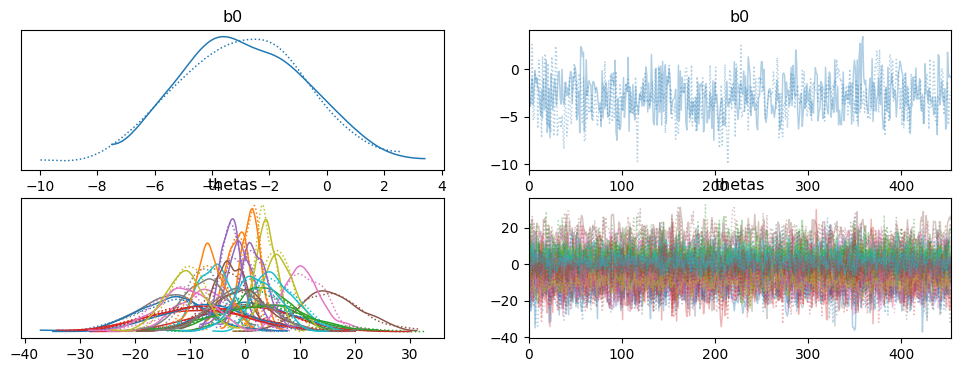

In [10]:
# ensure that there is convergence
pm.plot_trace(trace)
pm.summary(trace).round(2)

In [16]:
# need to take mean across all chains and draws
trace.posterior['thetas'].mean(dim=['chain', 'draw'])

<xarray.DataArray 'thetas' (thetas_dim_0: 30)>
array([  1.20572972,  -1.31389656,   2.60074539,  -0.25504096,
        -0.95048204,  15.67182568,  -7.00055558, -13.38866273,
         3.79699724,  -5.73522227, -13.20190602,   1.27209338,
         3.26851796,  -8.72224754,  -2.53680336,  -2.89986809,
        10.8179221 ,  -7.57996607,   6.10036616,   5.93070415,
        -7.45066959,  -6.26281334,   2.9243909 ,  -8.01848453,
         1.75451902,  -0.72224825, -11.46606559,  -0.90035237,
       -10.76674229,   1.87618574])
Coordinates:
  * thetas_dim_0  (thetas_dim_0) int64 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29

In [18]:
# Predictions

In [48]:
# now that we have our posterior, choose action based on the posterior
posterior_mean_thetas = trace.posterior['thetas'].mean(dim=['chain', 'draw'])
posterior_mean_bias = trace.posterior['b0'].mean(dim=['chain', 'draw']).item() #use item() to make it a scalar


In [42]:
posterior_mean_thetas.shape

(30,)

In [50]:
# posterior_mean_bias = trace.posterior['b0'].mean()
posterior_mean_bias
# trace.posterior['b0']

-2.8965754721108294

In [52]:
# perform inference on the test set
test_predictions_hx = np.dot(X_test, posterior_mean_thetas) + posterior_mean_bias
test_predictions_hx

array([   5.85374902,  -65.28091851,  -29.94194847,   50.47763914,
         44.50345935, -104.88098245, -100.08874664,  -19.3921897 ,
         -6.63534104,   34.04620303,   14.81580422,  -28.92108681,
         27.05192978,   -4.15723746,   21.75893863,  -34.36179237,
         28.00497958,   48.65945331,   60.15649494,  -69.36286683,
         12.87361856,   20.70677553, -100.73012549,   35.14233279,
         26.49413265,   32.80586901,   31.40290952,   20.27944741,
         26.24211622,  -58.54341676,   31.02531071,   37.19722529,
         17.96691824,   23.21830171,   38.42611333,   22.29220415,
        -13.73005812,    1.55215224,  -42.68998929,   15.99818556,
         47.44579977,  -44.98231131,   23.56281815,   31.42944407,
         -3.84999576,    4.80975198,   30.76056122,   34.23788612,
         15.23456676,   32.27119516,  -45.43905125,  -80.79656318,
         -1.46962296,    3.64314778,   53.6293671 ,   15.86947945,
         30.06903334, -113.62970815,   -5.9838815 ,   36.03114

In [54]:
# then, need to fit this to the sigmoid transfer function?
test_probabilities = 1 / (1 + np.exp(-test_predictions_hx))
test_probabilities

array([9.97139086e-01, 4.45509859e-29, 9.91692443e-14, 1.00000000e+00,
       1.00000000e+00, 2.82337174e-46, 3.40415741e-44, 3.78511450e-09,
       1.31140878e-03, 1.00000000e+00, 9.99999632e-01, 2.75252700e-13,
       1.00000000e+00, 1.54095630e-02, 1.00000000e+00, 1.19361203e-15,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 7.51778130e-31,
       9.99997435e-01, 9.99999999e-01, 1.79251310e-44, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999998e-01,
       1.00000000e+00, 3.75765712e-26, 1.00000000e+00, 1.00000000e+00,
       9.99999984e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.08920857e-06, 8.25224365e-01, 2.88385365e-19, 9.99999887e-01,
       1.00000000e+00, 2.91360328e-20, 1.00000000e+00, 1.00000000e+00,
       2.08364309e-02, 9.91916003e-01, 1.00000000e+00, 1.00000000e+00,
       9.99999758e-01, 1.00000000e+00, 1.84531613e-20, 8.13763964e-36,
       1.86999929e-01, 9.74497558e-01, 1.00000000e+00, 9.99999872e-01,
      

In [59]:
# tunable additional parameter, for classification it can be just > .5
threshold = 0.5

predicted_labels = (test_probabilities >= threshold).astype(int)
predicted_labels

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [60]:
# Assuming y_test contains the true labels

# Accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, predicted_labels)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, predicted_labels)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, predicted_labels)
print(f'F1 Score: {f1}')

# ROC-AUC Score (if you have probabilities)
roc_auc = roc_auc_score(y_test, test_predictions_hx)  # Use probabilities, not labels
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.956140350877193
Precision: 0.9852941176470589
Recall: 0.9436619718309859
F1 Score: 0.9640287769784172
ROC-AUC Score: 0.9931215198165739


In [67]:
# Confusion matrix
print(confusion_matrix(y_test, predicted_labels))

# Classification report
print(classification_report(y_test, predicted_labels))

# Accuracy score
print("Accuracy:", accuracy_score(y_test, predicted_labels))

# ROC-AUC score (uses probabbilities)
roc_auc = roc_auc_score(y_test, test_predictions_hx)  # use probabilities, not labels
print("ROC-AUC Score:", roc_auc)

[[42  1]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
ROC-AUC Score: 0.9931215198165739
